In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Chapitre 1 : Représentation des données : types et valeurs de base</center></span>

## E. Représentation binaire des caractères

### I. Les caractères alphanumériques

En informatique, les caractères alphanumériques sont **l'ensemble des symboles qui composent un texte** (chaîne de caractères). Ils se composent :
- des lettres majuscules et minuscules, accentuées ou non,
- des symboles de ponctuation ou autre ($ & , ; : % # ...),
- des chiffres.

**Attention** à ne pas confondre le caractère '1' et l'entier 1. Comme ce ne sont pas les mêmes types, l'opérateur $+$, par exemple, n'aura pas du tout le même effet : concaténation pour les caractères et addition pour les entiers. 

### II. Le codage ASCII

#### 1. La table ASCII

Inventée dans les années 60, la table ASCII (American Standard Code for Information Interchange) est un simple tableau qui établit une **correspondance entre 128 caractères et un nombre binaire de 8 bits**.

|    |0000 |0001 |0010 |0011 |0100 |0101 |0110 |0111 |1000 |1001 |1010 |1011 |1100 |1101 |1110 |1111 |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:| 
0000 | NUL | SOH | STX | ETX | EOT | ENQ | ACK | BEL |  BS |  HT |  LF |  VT |  FF |  CR |  SO |  SI |
0001 | DLE | DC1 | DC2 | DC3 | DC4 | NAK | SYN | ETB | CAN |  EM | SUB | ESC |  FS |  GS |  RS |  US |
0010 |  SP |  !  |  "  |  #  |  $  |  %  |  &  |  '  |  (  |  )  |  *  |  +  |  ,  |  -  |  .  |  /  |  
0011 |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  :  |  ;  |  <  |  =  |  >  |  ?  |
0100 |  @  |  A  |  B  |  C  |  D  |  E  |  F  |  G  |  H  |  I  |  J  |  K  |  L  |  M  |  N  |  O  |  
0101 |  P  |  Q  |  R  |  S  |  T  |  U  |  V  |  W  |  X  |  Y  |  Z  |  [  |  \  |  ]  |  ^  |  _  |
0110 |  `  |  a  |  b  |  c  |  d  |  e  |  f  |  g  |  h  |  i  |  j  |  k  |  l  |  m  |  n  |  o  |
0111 |  p  |  q  |  r  |  s  |  t  |  u  |  v  |  w  |  x  |  y  |  z  |  {  |  \|  |  }  |  ~  | DEL |

#### 2. Lecture de la table ASCII

Le codage binaire d'un caractère s'obtient en **concaténant les numéros binaires de sa ligne et de sa colonne**.

**Exemples :**
- Le codage de la lettre 'f' est 0110 0110 = 102. Le code ASCII de 'f' est donc 102.
- Vérifier que le codage de 'a' est 97 et celui de 'z' est 122.
- A l'aide de la table ASCII, coder en binaire le mot 'NSI'.

#### 3. Python et la table ASCII
En Python ,la fonction `ord(char)` renvoie le codage numérique ASCII du caractère `char` et la fonction `chr(n)` renvoie le caractère codé en ASCII par l'entier `n`.

**Application Python:**
- Vérifier que les codes ASCII de 'f', 'a' et 'z' sont bien 102, 97 et 122.
- Grâce à la fonction `f2` ci-dessous, écrire un programme qui, pour toutes les lettres de l'alphabet affiche un résultat du type `('a',97,'0b1100001')`.

In [3]:
def f2(nombre):
    return chr(nombre),nombre,bin(nombre)

#### 3. Quelques remarques sur la table ASCII
- Le tableau ne comporte **pas de caractères accentués** puisqu'il a été conçu pour la langue anglaise. C'est pour ça que les caractères accentués sont encore interdits dans les adresses mail.
- Les deux premières lignes correspondent à des **caractères de contrôle** (non affichables à l'écran), notamment utilisés par les premiers ordinateurs. Peu sont encore utilisés aujourd'hui mais on y reconnait quand même $ESC$ qui correspond à la touche $Echapp$ de nos claviers ou $BS$ pour $Backspace$ ou encore $DEL$ pour $Suppr$ (c'est le dernier caractère de la table).
- La table ASCII ne comporte que **128 caractères car, à l'origine, les caractères étaient codés sur 7 bits**. Mais la généralisation de l'utilisation de l'octet a conduit à coder les caractères sur 8 bits. C'est pourquoi tous les codes binaires commencent par 0.


#### 4. Trucs et astuces

La table ASCII n'a pas été construite au hasard, ainsi :
- Les **lettres** se suivent dans l'ordre alphabétique : de 65 à 90 pour les majuscules et de 97 à 122 pour les minuscules. Il faut donc **ajouter ou retrancher 32 pour passer de minsucule à majuscule et inversement**. Et comme $32=2^5$, il suffit de changer la valeur du 5ème bit pour passer de l'un à l'autre. Par exemple, G = 71 = 010**0**0111 et g = 103 = 010**1**0111.
- Les **chiffres** sont rangés par ordre croissant sur une même ligne, de sorte que **les 4 bits de droite de leur code correspond à leur valeur en binaire**.

|Code binaire|Caractère|Code ASCII|
|:-:|:-:|:-:|
|00110000|0|48
|00110001|1|49
|00110010|2|50
|00110011|3|51
|00110100|4|52
|00110101|5|53
|00110110|6|54
|00110111|7|55
|00111000|8|56
|00111001|9|57



### III. Les autres codages de caractères

Le codage ASCII tel que pensé à l'origine n'est pas adapté aux autres langues que l'anglais car il ne permet pas le codage des autres caractères spécifiques à chaque langue. Avec la généralisation des ordinateurs dans le monde entier, il a donc fallu créer des **extensions du codage ASCII**.


#### 3.1 L'extension à 256 caractères
On a vu que la table ASCII originelle ne compte que 128 caractères alors que le **codage sur un octet de 8 bits permettrait de coder 256 caractères**. L'extension la plus simple consiste donc simplement à conserver le même codage pour les caractères de la table ASCII et à **utiliser les 128 possibilités restantes pour coder d'autres caractères**.

Cela est tout à fait suffisant pour les **langues européennes qui utilisent l'aphabet latin**. Il existe plusieurs normes de codage mais, en europe occidentale, la plus utilisée est la **norme ISO-8559-1 ou ISO-Latin1** qui a été proposée par l'Organisation Internationale de Normalisation (Internation Organization for Standardisation). On peut citer aussi la norme **Windows-1252** de Microsoft (également appelée norme ANSI, sauf que l'ANSI, American National Standards Institute, n'a jamais validé cette table) qui est identique à quelques caractères prêt.


#### 3.2 La table ISO-8559-1

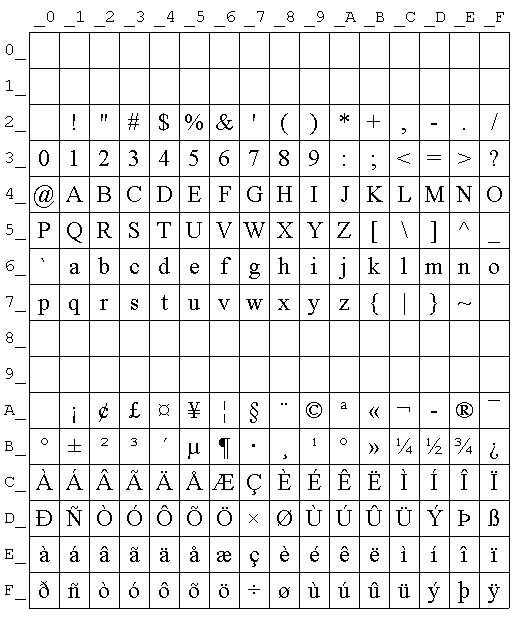

**Remarque :** Pour les tables étendues, on écrit souvent le code d'un caractère avec sa **valeur héxadécimale**.

**Application Python :**
- La fonction `ord(char)` permet-elle aussi d'obtenir les codes des caractères accentués ?
- Grâce à la fonction `chr(n)`, afficher quelques majuscules accentuées.
- Écrire une fonction qui prend en paramètres deux entiers et qui affiche toutes les lettres dont les codes numériques sont compris entre ces deux entiers.

#### 3.3 La table Unicode
Pour pouvoir coder **toutes les langues dans une seule table**, y compris celles qui n'utilisent pas du tout l'alphabet latin, comme le russe, le chinois ou l'hébreu, on a crée la **table Unicode**.

La table Unicode comporte prés de **150 000 caractères** ! Elle existe dans plusieurs versions, mais la plus répandue, **l'UTF-8**, représente aujourd'hui près de **90% du codage utilisé pour les caractères dans le monde**.

Les 128 premiers caractères de la table UTF-8 sont codés sur un octet, de façon identique à la table ASCII. Cela garantit la compatibilité entre ces 2 codages. Mais jusqu'à 4 octets peuvent être utilisés pour coder les autres caractères.

**Application Python :**
La fonction `f(lettre)` ci-dessous encode le caractère fourni en argument au format UTF-8 puis renvoie sa valeur décodée comme si c'était de l'ISO-latin1.
Tester cette fonction sur des caractères accentués.

In [4]:
def f(lettre):
    a=lettre.encode('utf8')
    b=a.decode('latin_1')
    return b

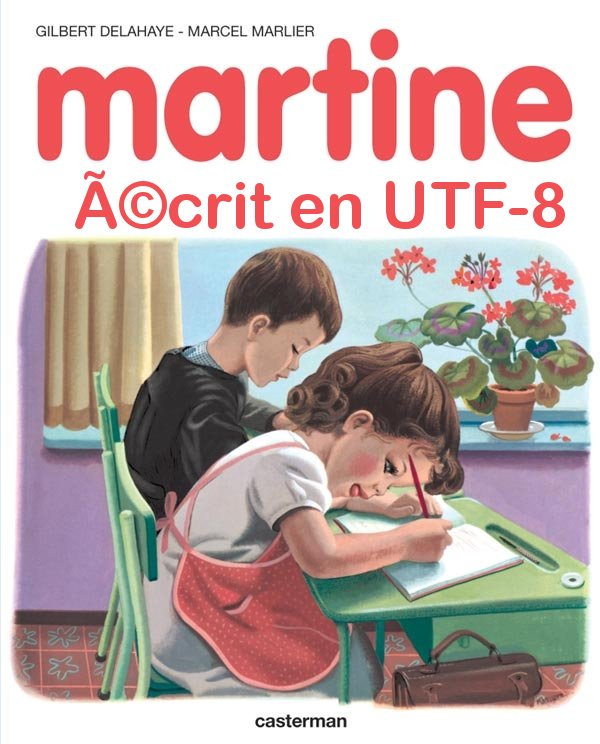

### Conclusion
Pour **décoder correctement un texte**, il est **nécessaire de savoir dans quelle norme il a été encodé**.

Cependant, la compatibilité des tables de codages les plus récentes avec le codage ASCII permet habituellement, dans tous les cas, de décoder correctement les caractères latins et la ponctuation d'un texte (mais pas les caractères accentués).

Pour terminer ce chapitre, il ne nous reste plus qu'à voir le [type booléen](cours_01_F.ipynb).

### Bonus
Étant donné quatre octets qui contiennent les valeurs binaires 00101000, 10011100, 01000011 et 10000000. Que représentent-ils si :
1. ce sont quatre nombres non signés ( sur 8 bits)?
2. ce sont deux nombres non signés sur 16 bits?
3. ce sont quatre nombres en complément à deux (sur 8 bits)?
4. ils sont sensés coder quatre caractères ASCII?, ISO-8859-1?, UTF?